__Title:__ Case Study 5: SVM & SGD  
__Authors:__ Will Butler, Robert (Reuven) Derner 
__Date:__ 10/31/23 

## Business Understanding

Firewall traffic

A cybersecur 

Data Source:

Provided by client with metadata dictionary regarding terms 

Use SVM and SGD to attempt to model and predict the class of an internet connection request.


In [1]:
# Import libraries
import pandas as pd


In [36]:
# Import data from github (next phase)
url = 'https://raw.githubusercontent.com/ReuvenDerner/MSDS_QuantifyingTheWorld/main/log2.csv'
data = pd.read_csv(url, encoding = "utf-8")

## Data Quality
Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods.

In [4]:
data.shape

(65532, 12)

### Examine the data

In [6]:
data.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


In [10]:
data.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


__Missing Values__  
The dataset contains no missing values upon code examination.

In [9]:
data.isnull().sum()

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Action                  0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
dtype: int64

In [8]:
# Features with Null Values and Percent missing
null_df = pd.DataFrame(data[data.columns[data.isnull().any()]].isnull().sum()).reset_index()
null_df.columns = ['Feature', 'Value']
null_df['Percent'] = round((null_df['Value'] / data.shape[0] * 100),2)

null_df

,Feature,Value,Percent


__Duplicate Values__  
There are 0 duplicate values in the data set. No action was needed.

## EDA Exploratory Data Analysis

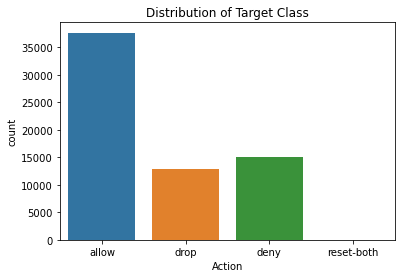

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Visualize the distribution of the target variable
sns.countplot(x='Action', data=data)
plt.title('Distribution of Target Class')
plt.show()


### Examine any Correlations 

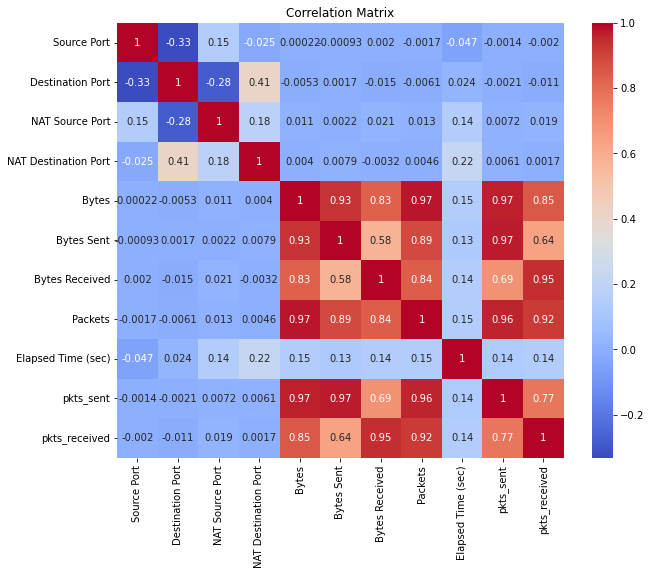

In [13]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [37]:
#Split the data into features and Target Variable
X = data.drop('Action', axis=1)
y = data['Action']


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=219)


In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [40]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear', C=1.0, decision_function_shape='ovr')
svm_classifier.fit(X_train, y_train)



SVC(kernel='linear')

In [41]:
from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(loss='log', max_iter=1000, tol=1e-3)
sgd_classifier.fit(X_train, y_train)


SGDClassifier(loss='log')

In [42]:
from sklearn.metrics import accuracy_score, classification_report

svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

print("SVM Accuracy:", svm_accuracy)
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))


SVM Accuracy: 0.9904631113145648
SVM Classification Report:
              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7462
        deny       0.99      0.97      0.98      2979
        drop       0.96      1.00      0.98      2659
  reset-both       0.00      0.00      0.00         7

    accuracy                           0.99     13107
   macro avg       0.74      0.74      0.74     13107
weighted avg       0.99      0.99      0.99     13107



C:\Users\19405\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\19405\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\19405\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
sgd_predictions = sgd_classifier.predict(X_test)
sgd_accuracy = accuracy_score(y_test, sgd_predictions)

print("SGD Classifier Accuracy:", sgd_accuracy)
print("SGD Classifier Classification Report:")
print(classification_report(y_test, sgd_predictions))


SGD Classifier Accuracy: 0.9777981231403067
SGD Classifier Classification Report:
              precision    recall  f1-score   support

       allow       1.00      0.98      0.99      7462
        deny       0.99      0.95      0.97      2979
        drop       0.91      1.00      0.95      2659
  reset-both       0.00      0.00      0.00         7

    accuracy                           0.98     13107
   macro avg       0.73      0.73      0.73     13107
weighted avg       0.98      0.98      0.98     13107



C:\Users\19405\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\19405\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\19405\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
from collections import Counter

# Count the predicted classes using SVM
svm_class_counts = Counter(svm_predictions)
print("SVM Predicted Class Counts:", svm_class_counts)

# Count the predicted classes using SGD Classifier
sgd_class_counts = Counter(sgd_predictions)
print("SGD Predicted Class Counts:", sgd_class_counts)


SVM Predicted Class Counts: Counter({'allow': 7442, 'deny': 2907, 'drop': 2758})
SGD Predicted Class Counts: Counter({'allow': 7316, 'drop': 2914, 'deny': 2877})


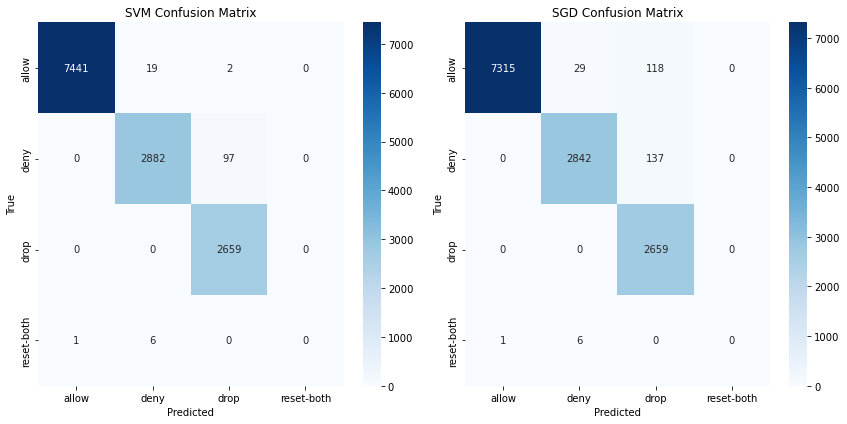

In [45]:
# Create and plot a confusion matrix
svm_cm = confusion_matrix(y_test, svm_predictions)
sgd_cm = confusion_matrix(y_test, sgd_predictions)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('SVM Confusion Matrix')

plt.subplot(1, 2, 2)
sns.heatmap(sgd_cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('SGD Confusion Matrix')

plt.tight_layout()
plt.show()

### Variant 2

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from the provided GitHub link
url = "https://raw.githubusercontent.com/ReuvenDerner/MSDS_QuantifyingTheWorld/main/log2.csv"
data = pd.read_csv(url)

# Split the data into features (X) and the target variable (y)
X = data.drop("Action", axis=1)
y = data["Action"]

# Convert the categorical target variable to numerical using Label Encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
# Support Vector Machine (SVM) model for multiclass classification
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)



SVC(kernel='linear')

In [30]:
# Stochastic Gradient Descent (SGD) model for multiclass classification
sgd_model = SGDClassifier(loss='hinge', max_iter=1000, random_state=42)
sgd_model.fit(X_train, y_train)



SGDClassifier(random_state=42)

In [31]:
# Predictions
svm_predictions = svm_model.predict(X_test)
sgd_predictions = sgd_model.predict(X_test)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, svm_predictions)
sgd_accuracy = accuracy_score(y_test, sgd_predictions)



In [32]:
# Print accuracy and classification report
print("Support Vector Machine (SVM) Model:")
print(f"Accuracy: {svm_accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, svm_predictions, target_names=label_encoder.classes_))

print("Stochastic Gradient Descent (SGD) Model:")
print(f"Accuracy: {sgd_accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, sgd_predictions, target_names=label_encoder.classes_))


Support Vector Machine (SVM) Model:
Accuracy: 0.99

Classification Report:
              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7545
        deny       1.00      0.96      0.98      2994
        drop       0.96      1.00      0.98      2562
  reset-both       0.00      0.00      0.00         6

    accuracy                           0.99     13107
   macro avg       0.74      0.74      0.74     13107
weighted avg       0.99      0.99      0.99     13107

Stochastic Gradient Descent (SGD) Model:
Accuracy: 0.98

Classification Report:
              precision    recall  f1-score   support

       allow       0.99      0.99      0.99      7545
        deny       0.99      0.92      0.96      2994
        drop       0.91      1.00      0.95      2562
  reset-both       0.00      0.00      0.00         6

    accuracy                           0.98     13107
   macro avg       0.72      0.73      0.73     13107
weighted avg       0.98      0

C:\Users\19405\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\19405\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\19405\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\19405\anaconda3\lib\site-packages\sklearn\metr

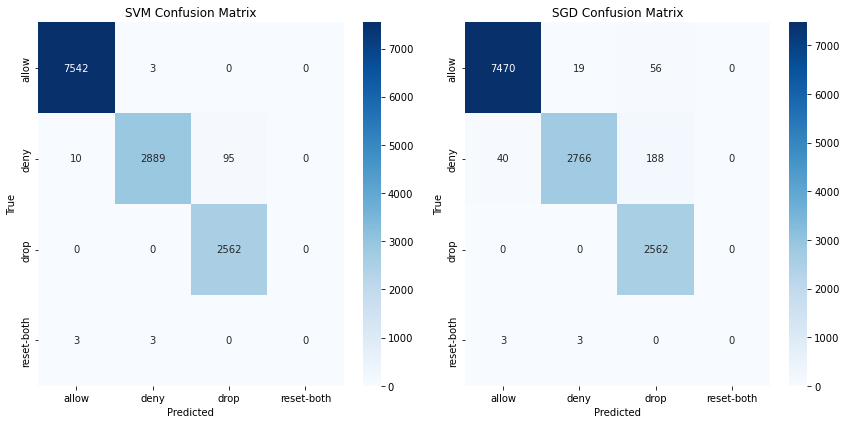

In [33]:

# Create and plot a confusion matrix
svm_cm = confusion_matrix(y_test, svm_predictions)
sgd_cm = confusion_matrix(y_test, sgd_predictions)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('SVM Confusion Matrix')

plt.subplot(1, 2, 2)
sns.heatmap(sgd_cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('SGD Confusion Matrix')

plt.tight_layout()
plt.show()
